# clustering method

In [1]:
# import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype, is_datetime64_dtype

pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
data_folder = 'data/'
listings_1 = pd.read_csv(data_folder + 'listings.csv')
reviews_1 = pd.read_csv(data_folder + 'reviews.csv')
calendar_1 = pd.read_csv(data_folder + 'calendar.csv')
neighborhoods_1 = pd.read_csv(data_folder + 'neighbourhoods.csv')

listings = listings_1.copy()


height has been deprecated.



In [2]:
# clean data as needed
# make all numerical data in float
date_columns = ['first_review', 'last_review', 'calendar_last_scraped', 'host_since', 'last_scraped']
for col in date_columns:
    if not is_datetime64_dtype(listings[col]):
        listings[col] = pd.to_datetime(listings[col])
        
price_columns = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']
for col in price_columns:
    if not is_numeric_dtype(listings[col]):
        listings[col] = listings[col].str.replace('$', '')
        listings[col] = listings[col].str.replace(',', '')
        listings[col] = listings[col].astype(np.float64)

percentage_columns = ['host_response_rate','host_acceptance_rate']
for col in percentage_columns:
    if not is_numeric_dtype(listings[col]):
        listings[col] = listings[col].str.replace('%', '')
        listings[col] = listings[col].str.replace(',', '')
        listings[col] = listings[col].astype(np.float64)/100
        
boolean_columns = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability','requires_license','instant_bookable','is_business_travel_ready','require_guest_profile_picture','require_guest_phone_verification']
for col in boolean_columns:
    for index,value in listings[col].iteritems():
        if listings[col][index]=='t':
            listings.set_value(index, col, 1.0)
        else:
            listings.set_value(index, col, 0.0)
            

In [126]:
# digitize amenities

amenity=listings['amenities'].apply(lambda x: x.replace('"', '').replace('{', '').replace('}', '').split(','))
amenity_dic={}
for index,value in amenity.iteritems():
    for item in value:
        if item != '':
            if item in amenity_dic.keys():
                amenity_dic[item]=amenity_dic[item]+1
            else:
                amenity_dic[item]=1


# print(amenity_dic)
sLength=len(listings['id'])
for key in amenity_dic:
#     print(key)
    listings[key] = pd.Series(np.zeros(sLength), index=listings.index)

for index,value in amenity.iteritems():
    for item in value:
        listings.set_value(index, item, 1.0)
print(amenity_dic)

{'Essentials': 4373, 'Long term stays allowed': 475, 'Pocket wifi': 44, 'Pool': 254, 'Extra pillows and blankets': 491, ' smooth pathway to front door': 39, 'Dishwasher': 689, 'Free parking on street': 8, 'Hot tub': 177, 'Self Check-In': 1436, 'translation missing: en.hosting_amenity_49': 1145, 'Waterfront': 19, 'Smoke detector': 4378, 'Game console': 32, 'Babysitter recommendations': 29, 'Wide clearance to shower & toilet': 16, 'Heating': 4622, 'BBQ grill': 86, 'Shampoo': 3427, 'Safety card': 678, 'Stair gates': 38, 'Hair dryer': 3303, 'Patio or balcony': 243, 'Wide entryway': 37, 'Cat(s)': 152, 'Other': 21, 'Pets allowed': 807, 'Stove': 942, 'Lock on bedroom door': 1133, 'Iron': 3321, 'Breakfast': 546, 'Room-darkening shades': 124, 'Free parking on premises': 1072, 'Ground floor access': 4, 'Air purifier': 2, 'First aid kit': 1587, 'Family/kid friendly': 2596, 'Refrigerator': 1042, 'Wide clearance to bed': 37, 'Fireplace guards': 16, 'Fire extinguisher': 2286, 'Microwave': 942, 'Well

In [136]:
listings.loc[0]
# print(listings['price'])

id                                                                                     20872145
listing_url                                               https://www.airbnb.com/rooms/20872145
scrape_id                                                                        20171005235014
last_scraped                                                                2017-10-06 00:00:00
name                                                                Charming Boston Residential
summary                                       Berber carpeting. The living room has two full...
space                                                                 It's on the second floor.
description                                   Berber carpeting. The living room has two full...
experiences_offered                                                                        none
neighborhood_overview                         Roslindale is an amazing up and coming town in...
notes                                   

2017-11-02
Essentials
Long term stays allowed
Pocket wifi
Pool
Extra pillows and blankets
 smooth pathway to front door
Dishwasher
Free parking on street
Hot tub
Self Check-In
translation missing: en.hosting_amenity_49
Waterfront
Smoke detector
Game console
Babysitter recommendations
Wide clearance to shower & toilet
Heating
BBQ grill
Shampoo
Safety card
Stair gates
Hair dryer
Patio or balcony
Wide entryway
Cat(s)
Other
Pets allowed
Stove
Lock on bedroom door
Iron
Breakfast
Room-darkening shades
Free parking on premises
Ground floor access
Air purifier
First aid kit
Family/kid friendly
Refrigerator
Wide clearance to bed
Fireplace guards
Fire extinguisher
Microwave
Well-lit path to entrance
Paid parking off premises
Smart lock
Flat
Lockbox
Disabled parking spot
Cleaning before checkout
Lake access
Laptop friendly workspace
Outlet covers
Washer / Dryer
Pets live on this property
Buzzer/wireless intercom
24-hour check-in
Wheelchair accessible
Pack ’n Play/travel crib
Private bathroom
Inte

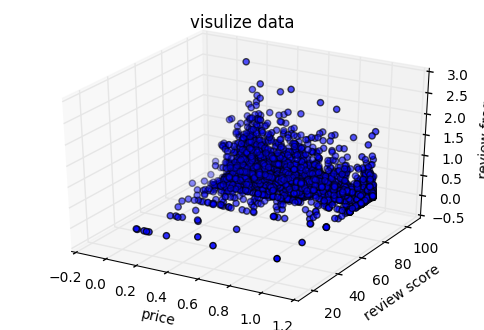

In [135]:
# getting each individual columns for plotting

# price
price=listings['price'].values/300
price[price>1]=1

# time on airbnb for normalization
import datetime as dt     
date = dt.date.today()
print(date)

listings['today'] = date
# print(type(date))
listings['today']=pd.to_datetime(listings['today'])
# print(listings['today'])
listings['host_since']=pd.to_datetime(listings['host_since'])
# print(listings['host_since'])
listings['days'] = (listings['today'] - listings['host_since']).dt.days
# print(listings['days'])
length=listings['days'].values

# review frequency
review_freq=listings['number_of_reviews'].values/(listings['days'].values/365*54)
reviews_per_month=listings['reviews_per_month'].values
# print (review_freq)

# ammenity score

# 'Essentials': 4373, 'Long term stays allowed': 475, 'Pocket wifi': 44, 'Pool': 254, 
# 'Extra pillows and blankets': 491, ' smooth pathway to front door': 39, 
# 'Dishwasher': 689, 'Free parking on street': 8, 'Hot tub': 177, 'Self Check-In': 1436, 
# 'translation missing: en.hosting_amenity_49': 1145, 'Waterfront': 19, 'Smoke detector': 4378, 
# 'Game console': 32, 'Babysitter recommendations': 29, 'Wide clearance to shower & toilet': 16, 
# 'Heating': 4622, 'BBQ grill': 86, 'Shampoo': 3427, 'Safety card': 678, 'Stair gates': 38, 
# 'Hair dryer': 3303, 'Patio or balcony': 243, 'Wide entryway': 37, 'Cat(s)': 152, 'Other': 21, 
# 'Pets allowed': 807, 'Stove': 942, 'Lock on bedroom door': 1133, 'Iron': 3321, 'Breakfast': 546, 
# 'Room-darkening shades': 124, 'Free parking on premises': 1072, 'Ground floor access': 4, 
# 'Air purifier': 2, 'First aid kit': 1587, 'Family/kid friendly': 2596, 'Refrigerator': 1042, 
# 'Wide clearance to bed': 37, 'Fireplace guards': 16, 'Fire extinguisher': 2286, 'Microwave': 942, 
# 'Well-lit path to entrance': 96, 'Paid parking off premises': 3, 'Smart lock': 189, 'Flat': 39, 
# 'Lockbox': 602, 'Disabled parking spot': 9, 'Cleaning before checkout': 23, 'Lake access': 5,
# 'Laptop friendly workspace': 3371, 'Outlet covers': 42, 'Washer / Dryer': 2, 
# 'Pets live on this property': 400, 'Buzzer/wireless intercom': 814, '24-hour check-in': 1346, 
# 'Wheelchair accessible': 137, 'Pack ’n Play/travel crib': 197, 'Private bathroom': 5,
# 'Internet': 2539, 'Wireless Internet': 4694, 'Oven': 893, 'Bed linens': 961, 'Cooking basics': 814,
# 'Smoking allowed': 77, 'Dishes and silverware': 920, 'Luggage dropoff allowed': 227, 
# 'Private entrance': 491, 'Dog(s)': 192, 'Elevator': 1140, 'Step-free access': 217, 
# 'Single level home': 50, 'Wide hallway clearance': 43, 'Carbon monoxide detector': 3845, 
# 'Handheld shower head': 16, 'High chair': 60, 'Baby bath': 51, 'Ski in/Ski out': 12, 
# 'Beach essentials': 17, 'Accessible-height bed': 37, 'Hangers': 3743, 'Beachfront': 5, 
# 'Bathtub with shower chair': 6, 'EV charger': 3, 'translation missing: en.hosting_amenity_50': 1350, 
# 'Children’s dinnerware': 39, 'Children’s books and toys': 71, 'Gym': 630, 'Private living room': 182, 
# 'Washer': 3403, 'Changing table': 22, 'Baby monitor': 18, 'TV': 3608, 'Kitchen': 4471, 
# 'Fixed grab bars for shower & toilet': 6, 'Hot water': 991, 'Keypad': 400, 'Bathtub': 464, 
# 'Hot water kettle': 49, 'Ethernet connection': 167, 'Other pet(s)': 12, 'Suitable for events': 155, 
# 'Table corner guards': 5, 'Coffee maker': 840, 'Dryer': 3391, 'Cable TV': 2231, 'Window guards': 16, 
# 'Garden or backyard': 149, 'Wide doorway': 125, 'Host greets you': 96, 'Air conditioning': 3895, 
# 'Indoor fireplace': 494, 'Accessible-height toilet': 21, 'Crib': 36, 'Doorman': 546, 'Firm mattress': 15
sLength=len(listings['id'])
amenity_score = np.zeros(sLength)
for amentities in amenity_dic.keys():
#     print(amentities)
    amenity_score=amenity_score+listings[amentities].values
# print(amenity_score)
listings['amenity_score'] = pd.Series(amenity_score, index=listings.index)

# review score rating
review_score=listings['review_scores_rating'].values

# latitude
latitude=listings['latitude'].values

# longtitude
longtitude=listings['longitude'].values



# plot any three dimension
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(price,review_score, review_freq)

# ax.scatter(price,listings['review_scores_rating'].values, review_freq)

ax.set_xlabel('price')
ax.set_ylabel('review score')
ax.set_zlabel('review freq')

plt.title("visulize data")
plt.show()


/Users/Pengji/miniconda2/envs/work_py3/lib/python3.5/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


[1 1 1 ..., 3 3 1]


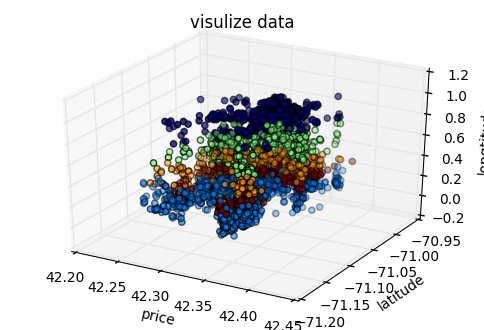

[1 1 1 ..., 3 3 3]


In [124]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_blobs


# X=np.vstack((price,review_score, review_freq)).T
X=np.vstack((price,latitude, longtitude)).T

X[np.isnan(X)]=0

# different cluster methods

# KMeans
y_pred_kmeans = KMeans(n_clusters=10, random_state=12345).fit_predict(X)

# DBSCAN
db = DBSCAN(eps=0.01, min_samples=25).fit(X)
y_pred_DBSCAN = db.labels_
# print(max(y_pred_DBSCAN),min(y_pred_DBSCAN))

# GaussianMixture
gmm = GaussianMixture(n_components=4,covariance_type='full', max_iter=20, random_state=0).fit(X)
y_pred_gmm=gmm.predict(X)
# gmm.fix(X)

# hierarchical clustering (WARD)
clustering = AgglomerativeClustering(linkage='ward', n_clusters=5)
y_pred_ward=clustering.fit_predict(X)
print(y_pred_ward)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,1],X[:,2],X[:,0],c=y_pred_ward)

# ax.scatter(price,listings['review_scores_rating'].values, review_freq)

ax.set_xlabel('price')
ax.set_ylabel('latitude')
ax.set_zlabel('longtitude')

plt.title("visulize data")
plt.show()